<a href="https://colab.research.google.com/github/pusatalamsemestaa/Machine-Learning/blob/main/Week5_PCVK(Angga_Bayu)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

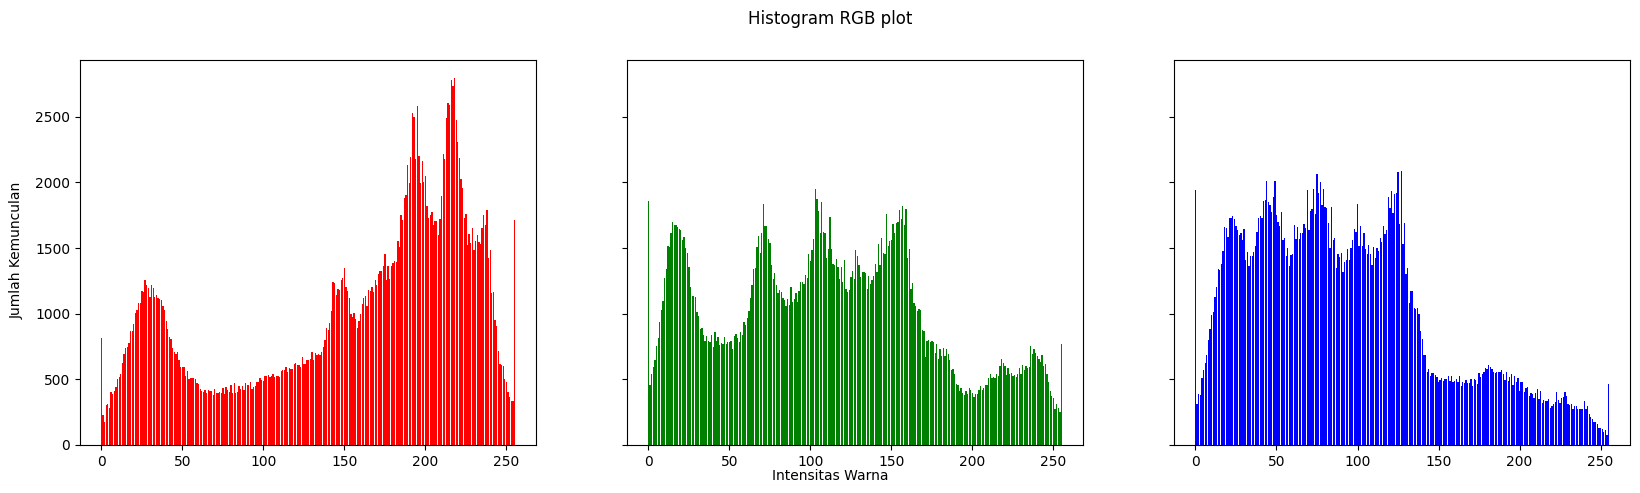

In [ ]:
#membuat histogram image (manual)
img = cv.imread('/content/drive/MyDrive/PCVK/Image Jobsheet/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
    for x in range(0,width) :
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

## Pertanyaan Praktikum 1


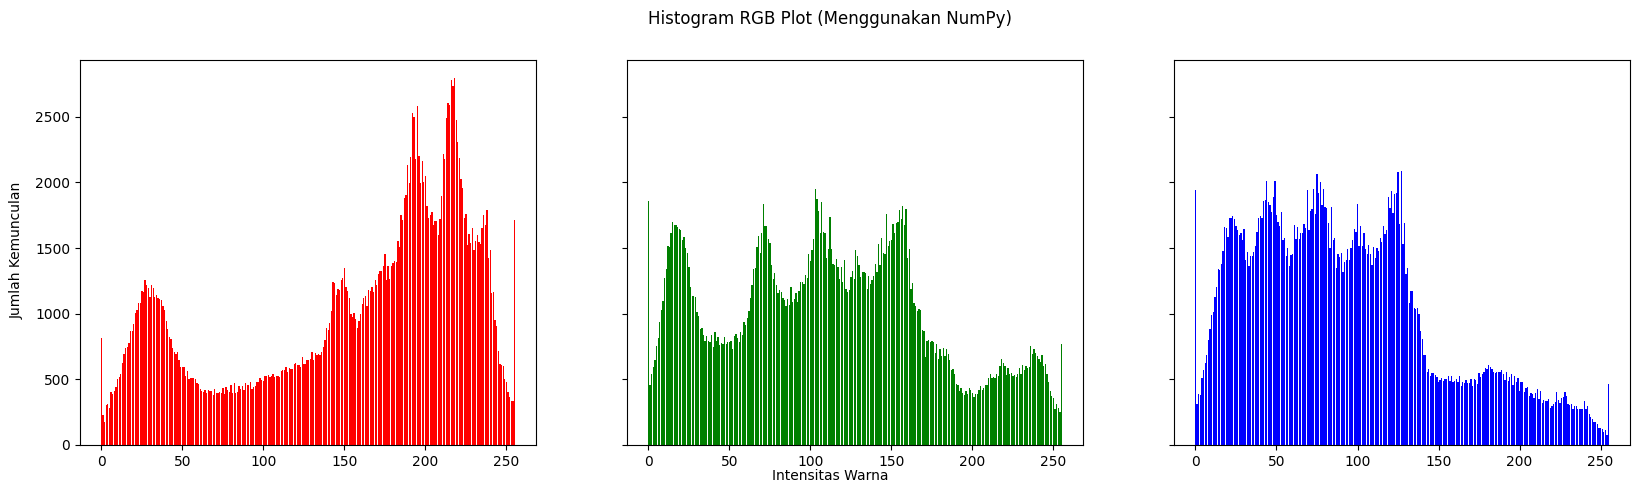

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Memuat gambar dan mengubah ke RGB
img = cv.imread('/content/drive/MyDrive/PCVK/Image Jobsheet/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Memisahkan kanal warna
red_channel = img[:,:,0]
green_channel = img[:,:,1]
blue_channel = img[:,:,2]

# Menghitung histogram menggunakan NumPy untuk setiap kanal
# .ravel() digunakan untuk meratakan (flatten) array 2D menjadi 1D
hist_red_np, bins = np.histogram(red_channel.ravel(), bins=256, range=[0, 256])
hist_green_np, bins = np.histogram(green_channel.ravel(), bins=256, range=[0, 256])
hist_blue_np, bins = np.histogram(blue_channel.ravel(), bins=256, range=[0, 256])

# Menampilkan plot histogram
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot (Menggunakan NumPy)')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, hist_red_np, color='red')
axs[1].bar(names, hist_green_np, color='green')
axs[2].bar(names, hist_blue_np, color='blue')

plt.show()

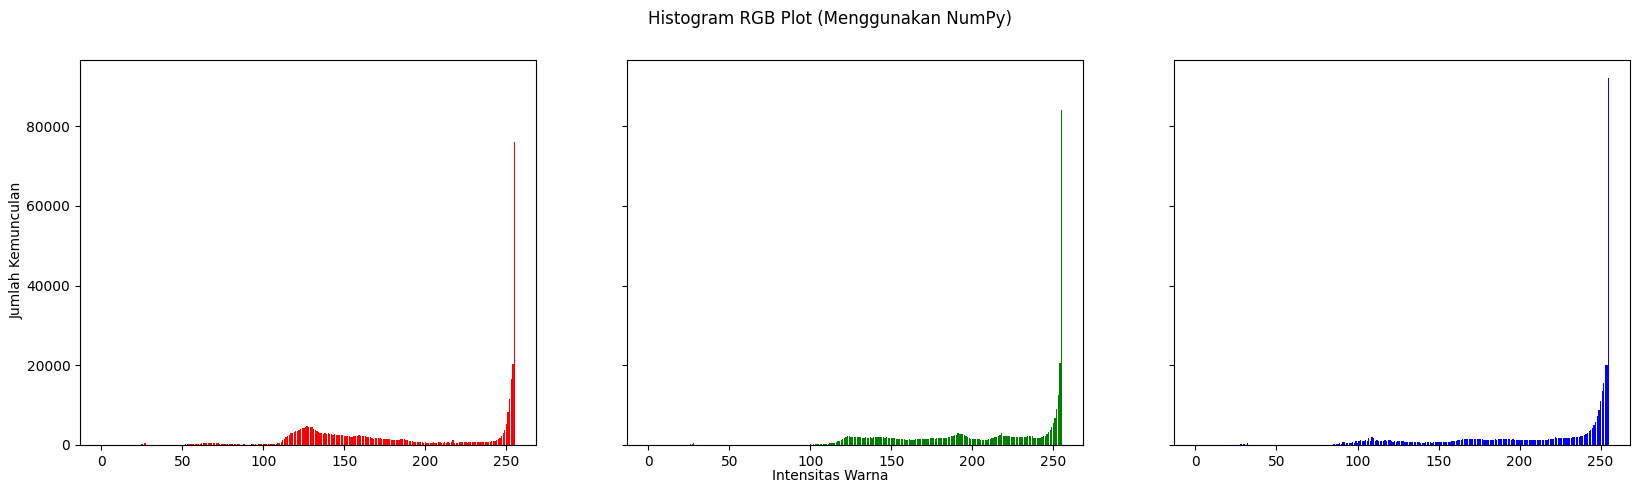

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Memuat gambar dan mengubah ke RGB
img = cv.imread('/content/drive/MyDrive/PCVK/Image Jobsheet/KTM lama.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Memisahkan kanal warna
red_channel = img[:,:,0]
green_channel = img[:,:,1]
blue_channel = img[:,:,2]

# Menghitung histogram menggunakan NumPy untuk setiap kanal
# .ravel() digunakan untuk meratakan (flatten) array 2D menjadi 1D
hist_red_np, bins = np.histogram(red_channel.ravel(), bins=256, range=[0, 256])
hist_green_np, bins = np.histogram(green_channel.ravel(), bins=256, range=[0, 256])
hist_blue_np, bins = np.histogram(blue_channel.ravel(), bins=256, range=[0, 256])

# Menampilkan plot histogram
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot (Menggunakan NumPy)')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, hist_red_np, color='red')
axs[1].bar(names, hist_green_np, color='green')
axs[2].bar(names, hist_blue_np, color='blue')

plt.show()

## Praktikum 2


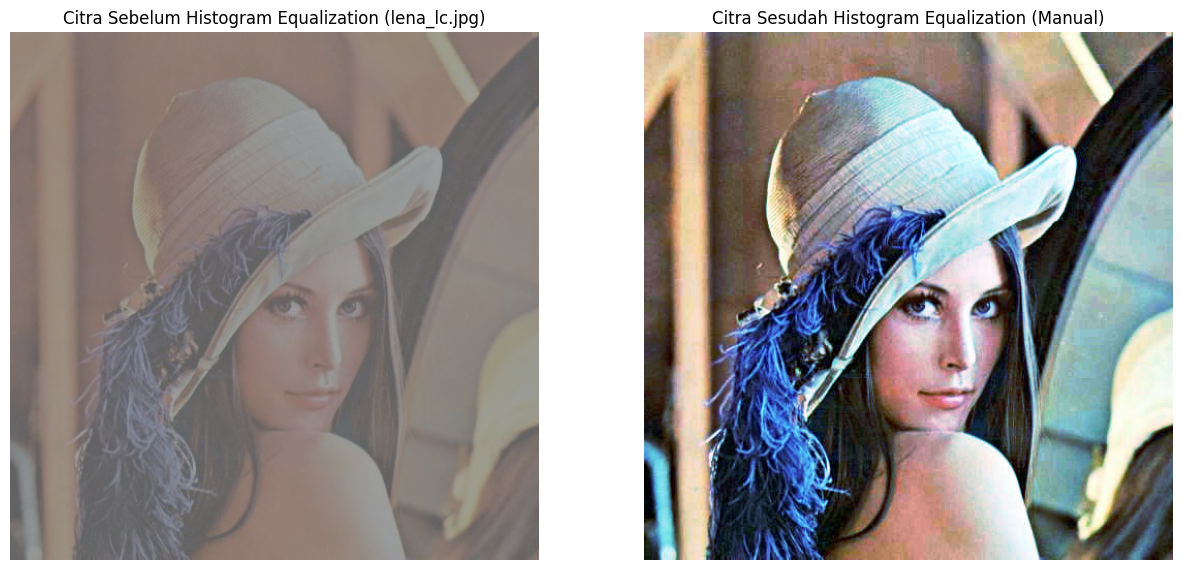

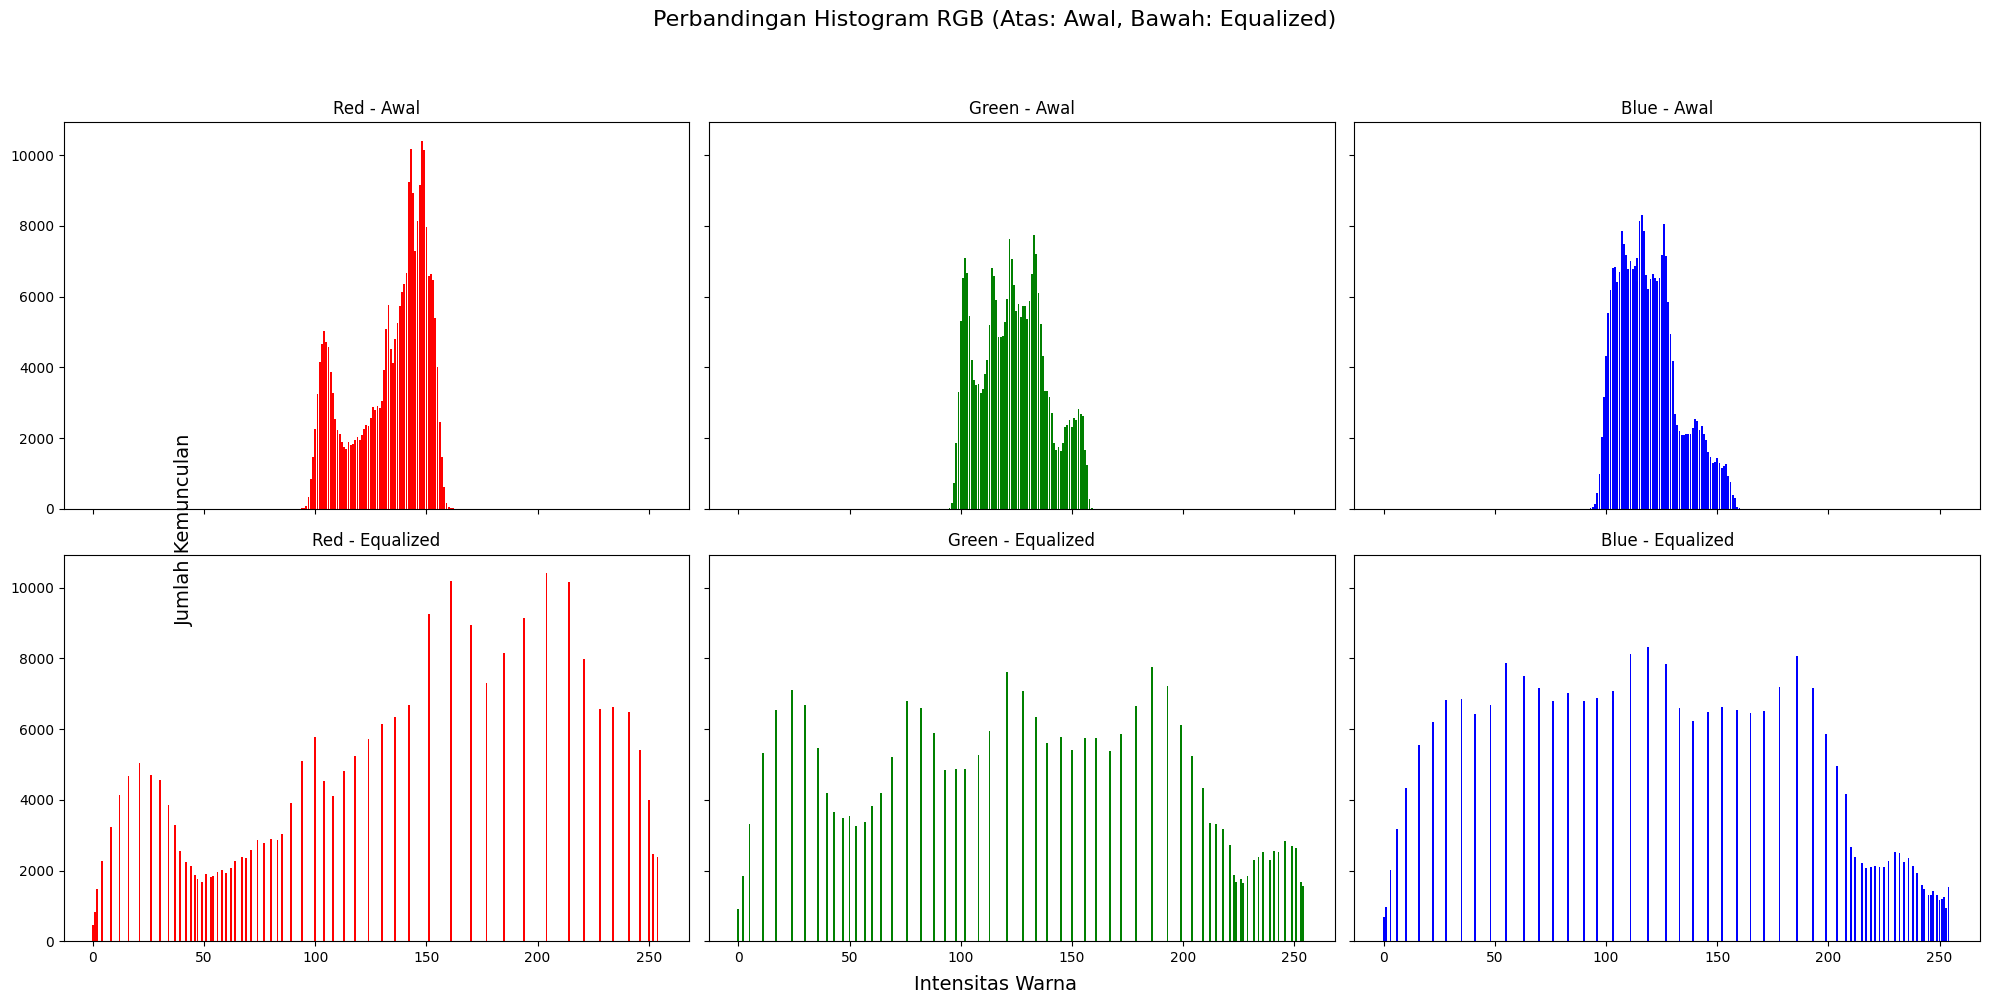

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- 0. Fungsi Manual Histogram Equalization ---
def manual_equalize_hist(channel):
    """Implementasi manual Histogram Equalization untuk satu saluran (grayscale)."""
    # 1. Hitung Histogram (H)
    hist, _ = np.histogram(channel.flatten(), 256, [0, 256])

    # 2. Hitung PMF/Normalized Histogram
    total_pixels = channel.size
    pmf = hist / total_pixels

    # 3. Hitung CDF
    cdf = pmf.cumsum()

    # 4. Hitung Transformasi (T)
    # T(k) = floor((L - 1) * CDF(k))
    L = 256  # Jumlah level intensitas
    # Pastikan transformasi menghasilkan nilai integer
    transformation_map = np.floor((L - 1) * cdf).astype(np.uint8)

    # 5. Terapkan Transformasi ke Citra
    # Gunakan transformasi sebagai Look-Up Table (LUT)
    equalized_channel = transformation_map[channel]

    return equalized_channel

# --- 1. Memuat dan Mengonversi Citra ---
# Pastikan jalur file sudah benar
path_lena_lc = '/content/drive/MyDrive/PCVK/Image Jobsheet/lena_lc.jpg'
img = cv.imread(path_lena_lc)

if img is None:
    print("Gagal memuat citra! Periksa jalur file.")
    path_lena = '/content/drive/MyDrive/PCVK/Image Jobsheet/lena.jpg'
    img = cv.imread(path_lena)
    if img is None:
        raise FileNotFoundError("Citra 'lena_lc.jpg' dan 'lena.jpg' tidak ditemukan di jalur yang ditentukan.")

# Citra awal dalam BGR untuk pemrosesan
img_bgr_awal = img.copy()
# Citra awal dalam RGB untuk tampilan Matplotlib dan perhitungan histogram awal
img_rgb_awal = cv.cvtColor(img_bgr_awal, cv.COLOR_BGR2RGB)

# --- 2. Proses Histogram Equalization (Manual Per Saluran BGR) ---
# Pisahkan saluran B, G, R (OpenCV default)
b_awal, g_awal, r_awal = cv.split(img_bgr_awal)

# Terapkan Histogram Equalization secara manual pada setiap saluran
r_eq = manual_equalize_hist(r_awal)
g_eq = manual_equalize_hist(g_awal)
b_eq = manual_equalize_hist(b_awal)

# Gabungkan saluran yang sudah di-equalize (urutan BGR)
img_equalized_bgr = cv.merge((b_eq, g_eq, r_eq))
# Konversi ke RGB untuk tampilan Matplotlib
img_rgb_akhir = cv.cvtColor(img_equalized_bgr, cv.COLOR_BGR2RGB)

# --- 3. Menghitung Histogram Citra Awal dan Hasil Equalization ---

# Fungsi untuk menghitung histogram citra awal (dari kode manual Anda)
def calculate_histogram_manual(img_rgb):
    height, width, depth = np.shape(img_rgb)
    red = [0]*256
    green = [0]*256
    blue = [0]*256

    for y in range(0,height) :
        for x in range(0,width) :
            red[img_rgb[y][x][0]] += 1
            green[img_rgb[y][x][1]] += 1
            blue[img_rgb[y][x][2]] += 1
    return red, green, blue

# Hitung histogram
red_awal, green_awal, blue_awal = calculate_histogram_manual(img_rgb_awal)
red_eq, green_eq, blue_eq = calculate_histogram_manual(img_rgb_akhir)
names = np.arange(256)

# --- 4. Menampilkan Citra Sebelum dan Sesudah Equalization ---
plt.figure(figsize=(15, 7))

# Tampilkan Citra Awal
plt.subplot(1, 2, 1)
plt.imshow(img_rgb_awal)
plt.title('Citra Sebelum Histogram Equalization (lena_lc.jpg)')
plt.axis('off')

# Tampilkan Citra Sesudah Equalization
plt.subplot(1, 2, 2)
plt.imshow(img_rgb_akhir)
plt.title('Citra Sesudah Histogram Equalization (Manual)')
plt.axis('off')

plt.show()

# --- 5. Menampilkan Histogram (Awal dan Equalized) ---

# Buat subplot 2 baris (Awal dan Equalized) dan 3 kolom (R, G, B)
fig, axs = plt.subplots(2, 3, figsize=[20,10], sharex=True, sharey=True)
fig.suptitle('Perbandingan Histogram RGB (Atas: Awal, Bawah: Equalized)', fontsize=16, y=1.02)

# Row 1: Histogram Awal
axs[0, 0].bar(names, red_awal, color='red')
axs[0, 0].set_title('Red - Awal', fontsize=12)
axs[0, 1].bar(names, green_awal, color='green')
axs[0, 1].set_title('Green - Awal', fontsize=12)
axs[0, 2].bar(names, blue_awal, color='blue')
axs[0, 2].set_title('Blue - Awal', fontsize=12)

# Row 2: Histogram Equalized
axs[1, 0].bar(names, red_eq, color='red')
axs[1, 0].set_title('Red - Equalized', fontsize=12)
axs[1, 1].bar(names, green_eq, color='green')
axs[1, 1].set_title('Green - Equalized', fontsize=12)
axs[1, 2].bar(names, blue_eq, color='blue')
axs[1, 2].set_title('Blue - Equalized', fontsize=12)

# Label Sumbu Umum
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center', fontsize=14)

# Hilangkan label y-axis di kolom tengah dan kanan
for i in range(3):
    axs[0, i].tick_params(axis='y', labelleft=True if i == 0 else False)
    axs[1, i].tick_params(axis='y', labelleft=True if i == 0 else False)

plt.tight_layout(rect=[0, 0.05, 1, 0.98]) # Sesuaikan layout agar tidak tumpang tindih
plt.show()

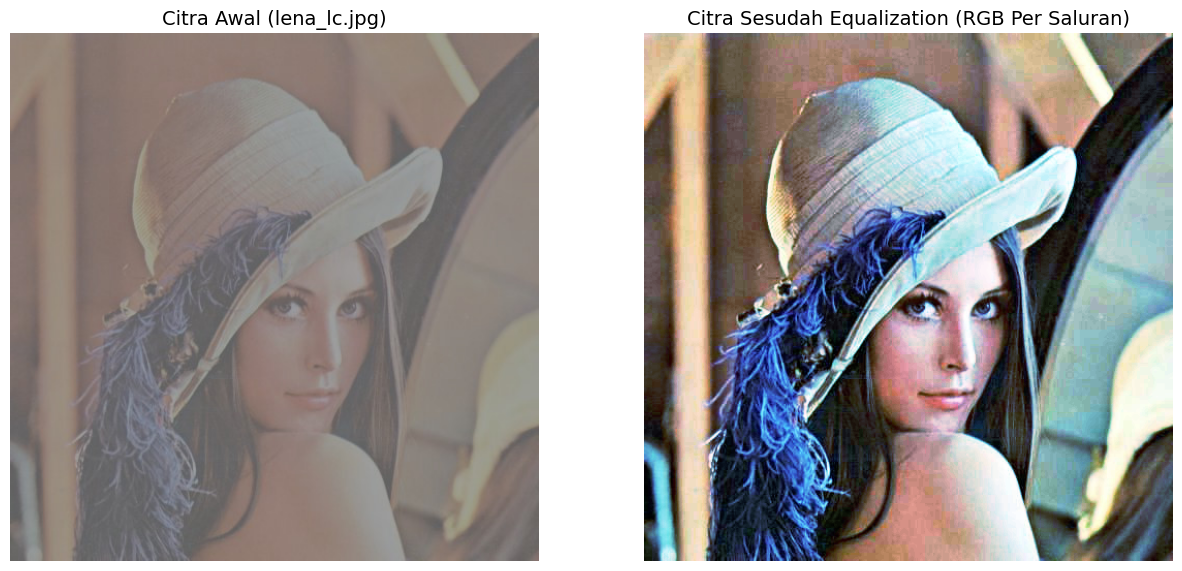

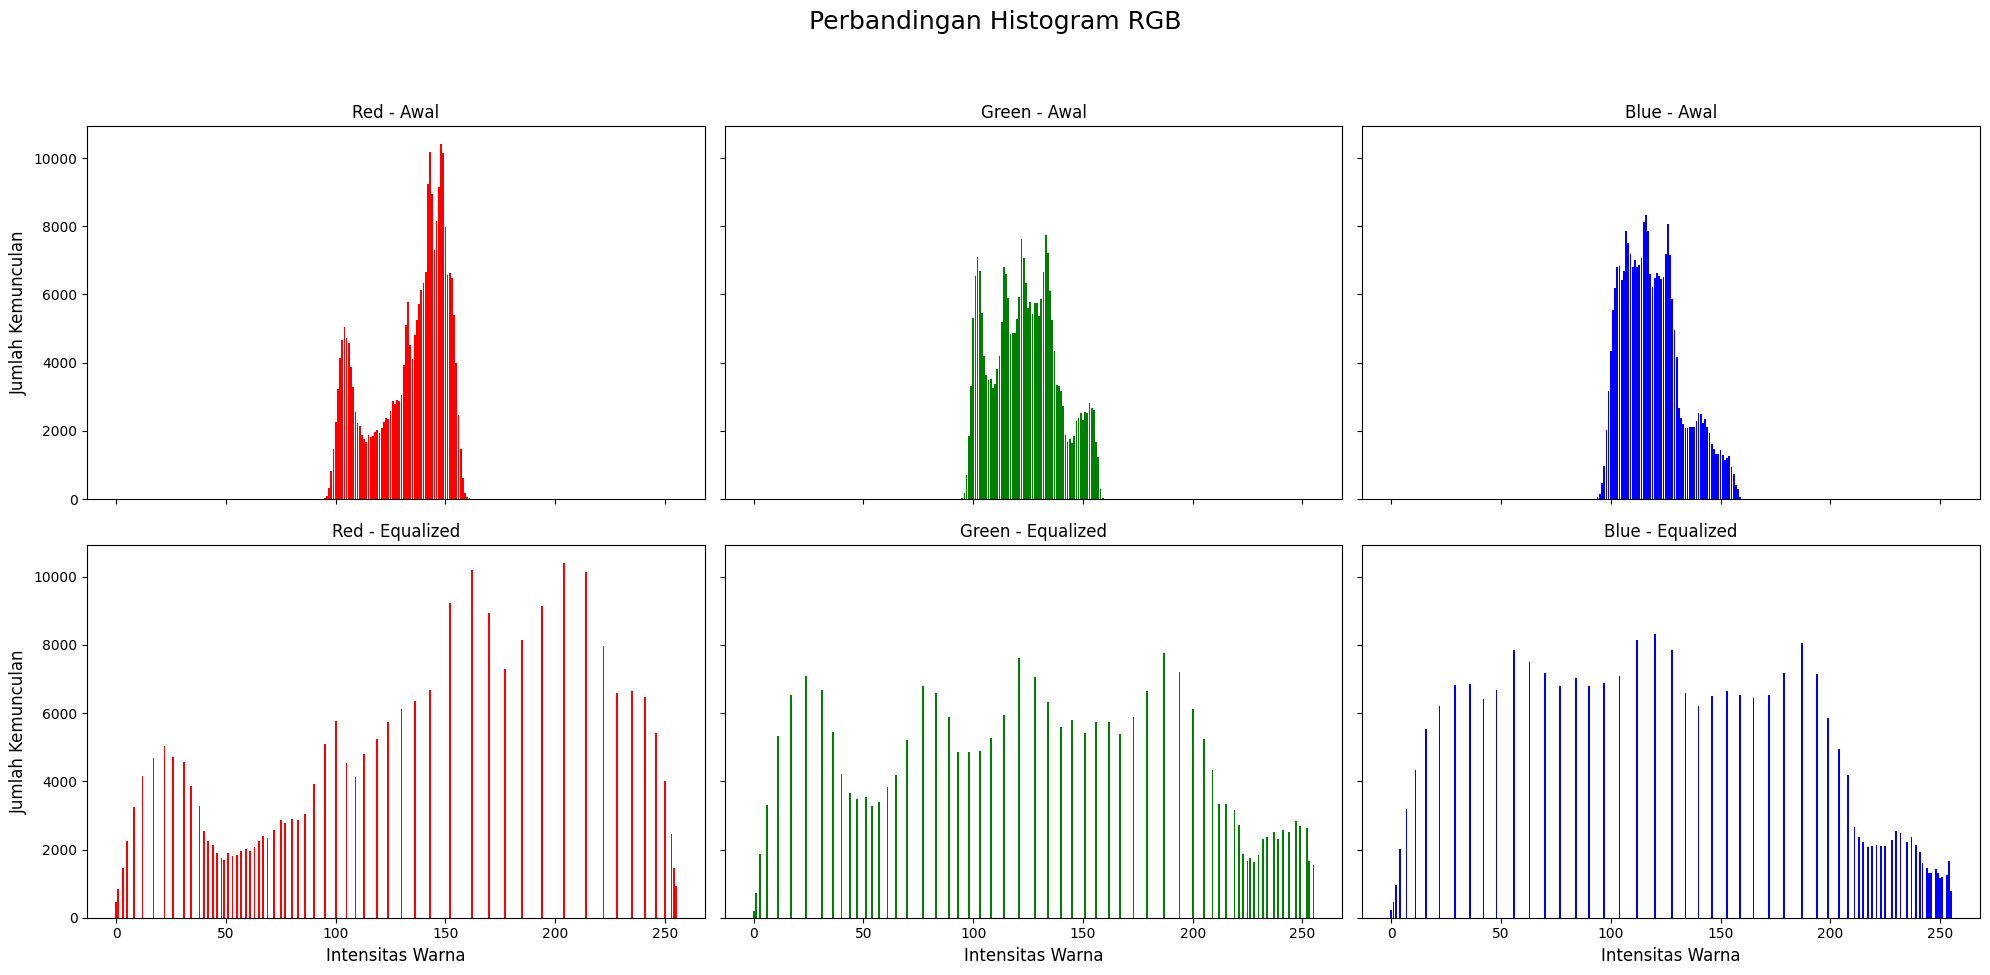

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Persiapan Citra ---
# Gunakan 'lena_lc.jpg' sesuai instruksi soal
# Ganti dengan path yang benar di environment Anda
path_lena_lc = '/content/drive/MyDrive/PCVK/Image Jobsheet/lena_lc.jpg'
image = cv.imread(path_lena_lc)

if image is None:
    print(f"Gagal memuat citra di jalur: {path_lena_lc}")
    print("Mencoba menggunakan 'lena.jpg' sebagai alternatif.")
    # Fallback ke lena.jpg jika lena_lc.jpg tidak ditemukan
    path_lena = '/content/drive/MyDrive/PCVK/Image Jobsheet/lena.jpg'
    image = cv.imread(path_lena)
    if image is None:
        raise FileNotFoundError("Kedua citra (lena_lc.jpg dan lena.jpg) tidak ditemukan di jalur yang ditentukan.")

# Konversi BGR ke RGB untuk tampilan Matplotlib
img_rgb_awal = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# --- 2. Proses Histogram Equalization (Lanjutan dari Kode Anda) ---
# Pisahkan saluran B, G, R (OpenCV membaca dalam BGR)
b, g, r = cv.split(image)

# Lakukan Equalization pada setiap saluran
b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

# Gabungkan saluran yang sudah di-equalize menjadi citra baru
img_equalized_bgr = cv.merge((b_equalized, g_equalized, r_equalized))
img_rgb_akhir = cv.cvtColor(img_equalized_bgr, cv.COLOR_BGR2RGB)


# --- 3. Fungsi Penghitung Histogram (Manual) ---
def calculate_histogram(img_rgb):
    """Menghitung histogram R, G, B dari citra RGB secara manual."""
    height, width, depth = np.shape(img_rgb)
    hist_r = [0] * 256
    hist_g = [0] * 256
    hist_b = [0] * 256

    for y in range(height):
        for x in range(width):
            hist_r[img_rgb[y][x][0]] += 1
            hist_g[img_rgb[y][x][1]] += 1
            hist_b[img_rgb[y][x][2]] += 1
    return hist_r, hist_g, hist_b

# Hitung histogram untuk citra Awal dan Equalized
red_awal, green_awal, blue_awal = calculate_histogram(img_rgb_awal)
red_eq, green_eq, blue_eq = calculate_histogram(img_rgb_akhir)
names = np.arange(256)


# --- 4. Tampilan Citra Awal dan Equalized ---
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb_awal)
plt.title('Citra Awal (lena_lc.jpg)', fontsize=14)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_akhir)
plt.title('Citra Sesudah Equalization (RGB Per Saluran)', fontsize=14)
plt.axis('off')

plt.show()

# --- 5. Tampilan Perbandingan Histogram ---

# Siapkan data untuk plotting: Baris 1 (Awal), Baris 2 (Equalized)
histograms = [
    (red_awal, green_awal, blue_awal),
    (red_eq, green_eq, blue_eq)
]
titles_suffix = ['Awal', 'Equalized']
colors = ['red', 'green', 'blue']
titles_channel = ['Red', 'Green', 'Blue']

fig, axs = plt.subplots(2, 3, figsize=[20,10], sharex=True, sharey=True)
fig.suptitle('Perbandingan Histogram RGB', fontsize=18, y=1.02)

for row in range(2):
    for col in range(3):
        # Pilih data histogram yang sesuai (R, G, atau B)
        data = histograms[row][col]
        color = colors[col]

        axs[row, col].bar(names, data, color=color)
        axs[row, col].set_title(f'{titles_channel[col]} - {titles_suffix[row]}', fontsize=12)

        # Atur label sumbu hanya untuk plot yang paling kiri dan paling bawah
        if col == 0:
             # Label Y hanya di kolom pertama
            axs[row, col].set_ylabel('Jumlah Kemunculan', fontsize=12)

        if row == 1:
             # Label X hanya di baris kedua
            axs[row, col].set_xlabel('Intensitas Warna', fontsize=12)

# Sesuaikan tata letak untuk mencegah tumpang tindih
plt.tight_layout(rect=[0, 0.05, 1, 0.98])
plt.show()

# Pertanyaan Praktikum 2

*   Hitung nilai PSNR antara citra asli dan citra hasil equalization.





PSNR antara Citra Asli dan Citra Hasil Equalization: 12.66 dB


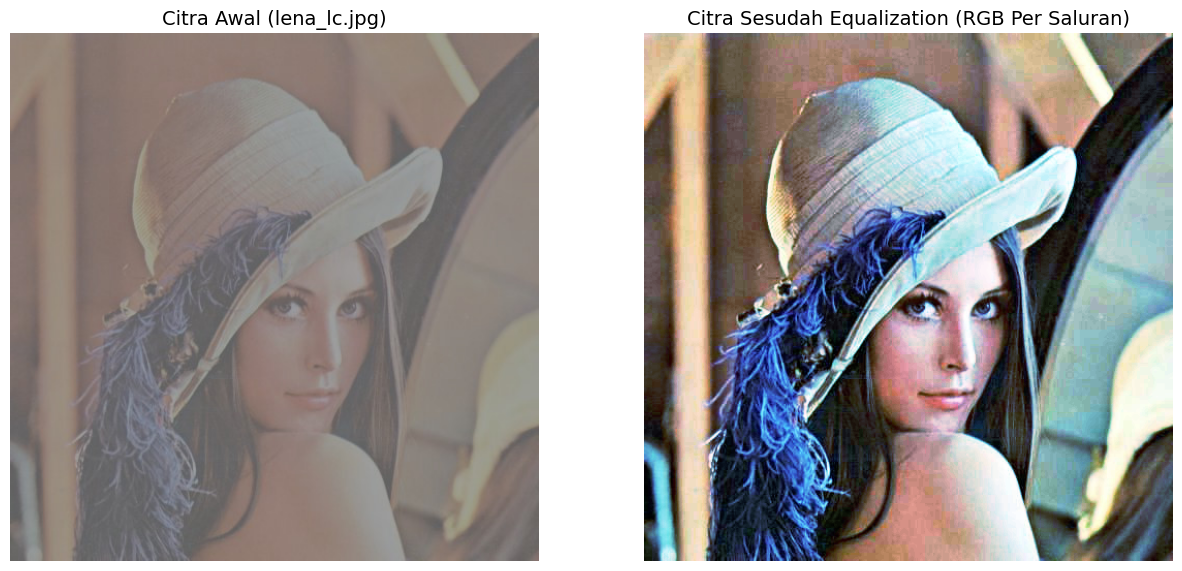

<Figure size 640x480 with 0 Axes>

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

# --- 1. Persiapan Citra ---
# Gunakan 'lena_lc.jpg' sesuai instruksi soal
# Ganti dengan path yang benar di environment Anda
path_lena_lc = '/content/drive/MyDrive/PCVK/Image Jobsheet/lena_lc.jpg'
image = cv.imread(path_lena_lc)

if image is None:
    print(f"Gagal memuat citra di jalur: {path_lena_lc}")
    print("Mencoba menggunakan 'lena.jpg' sebagai alternatif.")
    # Fallback ke lena.jpg jika lena_lc.jpg tidak ditemukan
    path_lena = '/content/drive/MyDrive/PCVK/Image Jobsheet/lena.jpg'
    image = cv.imread(path_lena)
    if image is None:
        raise FileNotFoundError("Kedua citra (lena_lc.jpg dan lena.jpg) tidak ditemukan di jalur yang ditentukan.")

# Citra asli dalam BGR
img_bgr_awal = image.copy()
# Konversi BGR ke RGB untuk tampilan Matplotlib
img_rgb_awal = cv.cvtColor(img_bgr_awal, cv.COLOR_BGR2RGB)


# --- 2. Proses Histogram Equalization ---
# Pisahkan saluran B, G, R (OpenCV membaca dalam BGR)
b, g, r = cv.split(img_bgr_awal)

# Lakukan Equalization pada setiap saluran
b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

# Gabungkan saluran yang sudah di-equalize menjadi citra baru (BGR)
img_equalized_bgr = cv.merge((b_equalized, g_equalized, r_equalized))
img_rgb_akhir = cv.cvtColor(img_equalized_bgr, cv.COLOR_BGR2RGB)


# --- 3. Perhitungan PSNR ---

def calculate_psnr(img1, img2):
    """Menghitung PSNR antara dua citra (diharapkan dalam format numpy.uint8)."""
    # Pastikan citra memiliki tipe data yang sama dan dimensi yang sama
    if img1.shape != img2.shape:
        raise ValueError("Citra harus memiliki dimensi yang sama.")

    # Hitung Mean Squared Error (MSE)
    # Gunakan citra dalam format BGR (img_bgr_awal dan img_equalized_bgr)
    # atau ubah citra RGB ke tipe data float untuk perhitungan yang akurat

    # Konversi ke float untuk akurasi perhitungan
    img1_float = img1.astype(np.float64)
    img2_float = img2.astype(np.float64)

    mse = np.mean((img1_float - img2_float) ** 2)

    if mse == 0:
        # Jika MSE nol, citra identik
        return float('inf')

    # Nilai piksel maksimum untuk citra 8-bit adalah 255
    MAX_I = 255.0

    # Hitung PSNR
    psnr = 10 * math.log10(MAX_I**2 / mse)
    return psnr

# Hitung PSNR antara citra asli dan citra hasil equalization
# Disarankan menggunakan citra BGR (img_bgr_awal vs img_equalized_bgr)
psnr_value = calculate_psnr(img_bgr_awal, img_equalized_bgr)

# --- 4. Tampilkan Hasil PSNR dan Plotting (Sesuai Kode Anda) ---

print(f"==================================================")
print(f"PSNR antara Citra Asli dan Citra Hasil Equalization: {psnr_value:.2f} dB")
print(f"==================================================")

# --- Bagian 3, 4, dan 5 (Plotting) dari kode Anda sebelumnya dihilangkan untuk fokus pada PSNR
#    Namun, jika Anda ingin menyertakannya, pastikan variabel-variabel di bawah ini
#    telah dihitung atau didefinisikan sebelumnya (seperti yang ada di kode awal).
#    ...
# --- 3. Fungsi Penghitung Histogram (Manual) ---
def calculate_histogram(img_rgb):
    """Menghitung histogram R, G, B dari citra RGB secara manual."""
    height, width, depth = np.shape(img_rgb)
    hist_r = [0] * 256
    hist_g = [0] * 256
    hist_b = [0] * 256

    for y in range(height):
        for x in range(width):
            hist_r[img_rgb[y][x][0]] += 1
            hist_g[img_rgb[y][x][1]] += 1
            hist_b[img_rgb[y][x][2]] += 1
    return hist_r, hist_g, hist_b

# Hitung histogram untuk citra Awal dan Equalized
red_awal, green_awal, blue_awal = calculate_histogram(img_rgb_awal)
red_eq, green_eq, blue_eq = calculate_histogram(img_rgb_akhir)
names = np.arange(256)


# --- 4. Tampilan Citra Awal dan Equalized ---
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb_awal)
plt.title('Citra Awal (lena_lc.jpg)', fontsize=14)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_akhir)
plt.title('Citra Sesudah Equalization (RGB Per Saluran)', fontsize=14)
plt.axis('off')

plt.show()

# Sesuaikan tata letak untuk mencegah tumpang tindih
plt.tight_layout(rect=[0, 0.05, 1, 0.98])
plt.show()

## Terapkan histogram equalization pada citra KTM lama.jpg.


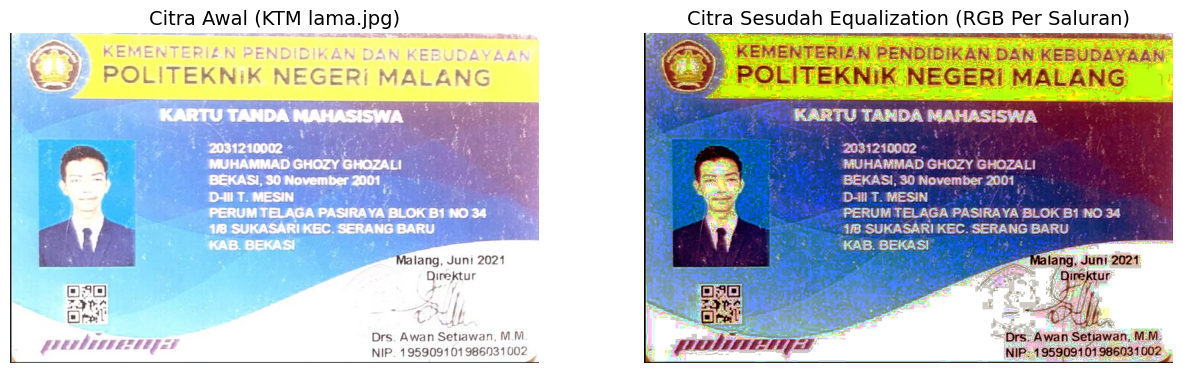

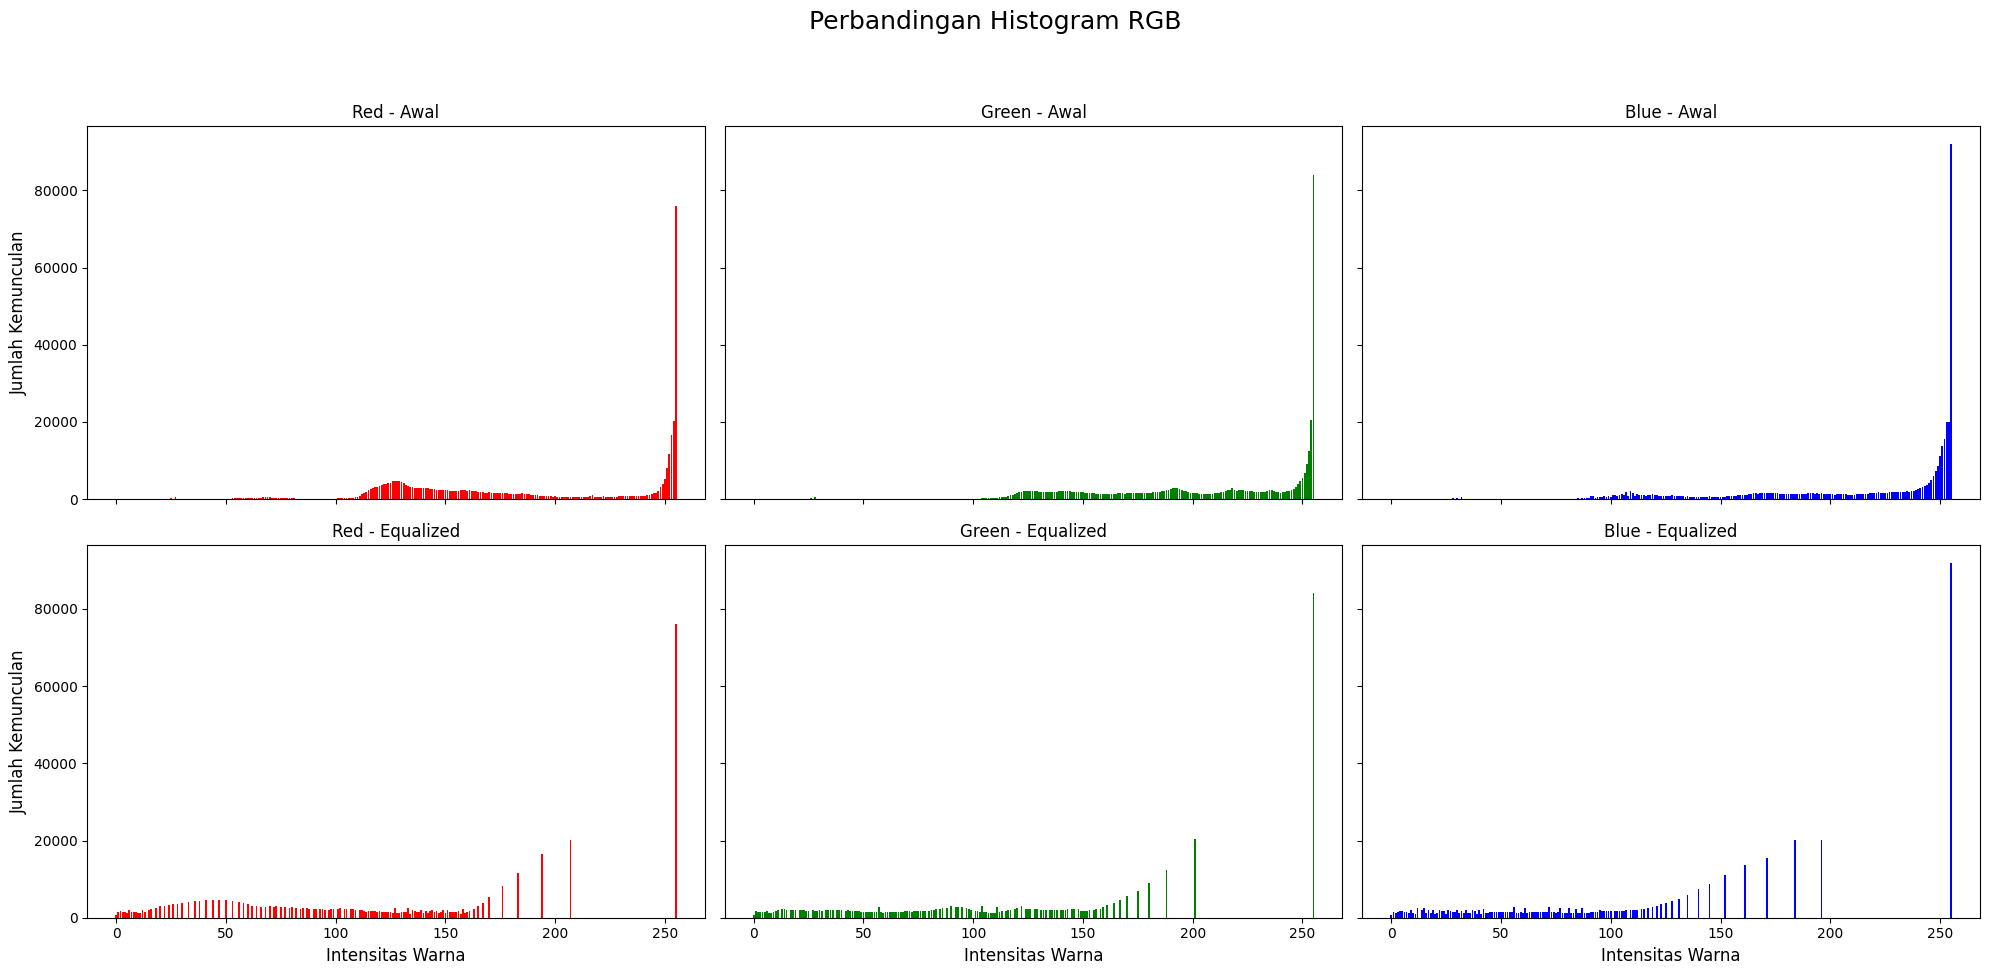

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Persiapan Citra ---
# Gunakan 'lena_lc.jpg' sesuai instruksi soal
# Ganti dengan path yang benar di environment Anda
path_lena_lc = '/content/drive/MyDrive/PCVK/Image Jobsheet/KTM lama.jpg'
image = cv.imread(path_lena_lc)

if image is None:
    print(f"Gagal memuat citra di jalur: {path_lena_lc}")
    print("Mencoba menggunakan 'lena.jpg' sebagai alternatif.")
    # Fallback ke lena.jpg jika lena_lc.jpg tidak ditemukan
    path_lena = '/content/drive/MyDrive/PCVK/Image Jobsheet/lena.jpg'
    image = cv.imread(path_lena)
    if image is None:
        raise FileNotFoundError("Kedua citra (lena_lc.jpg dan lena.jpg) tidak ditemukan di jalur yang ditentukan.")

# Konversi BGR ke RGB untuk tampilan Matplotlib
img_rgb_awal = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# --- 2. Proses Histogram Equalization (Lanjutan dari Kode Anda) ---
# Pisahkan saluran B, G, R (OpenCV membaca dalam BGR)
b, g, r = cv.split(image)

# Lakukan Equalization pada setiap saluran
b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

# Gabungkan saluran yang sudah di-equalize menjadi citra baru
img_equalized_bgr = cv.merge((b_equalized, g_equalized, r_equalized))
img_rgb_akhir = cv.cvtColor(img_equalized_bgr, cv.COLOR_BGR2RGB)


# --- 3. Fungsi Penghitung Histogram (Manual) ---
def calculate_histogram(img_rgb):
    """Menghitung histogram R, G, B dari citra RGB secara manual."""
    height, width, depth = np.shape(img_rgb)
    hist_r = [0] * 256
    hist_g = [0] * 256
    hist_b = [0] * 256

    for y in range(height):
        for x in range(width):
            hist_r[img_rgb[y][x][0]] += 1
            hist_g[img_rgb[y][x][1]] += 1
            hist_b[img_rgb[y][x][2]] += 1
    return hist_r, hist_g, hist_b

# Hitung histogram untuk citra Awal dan Equalized
red_awal, green_awal, blue_awal = calculate_histogram(img_rgb_awal)
red_eq, green_eq, blue_eq = calculate_histogram(img_rgb_akhir)
names = np.arange(256)


# --- 4. Tampilan Citra Awal dan Equalized ---
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb_awal)
plt.title('Citra Awal (KTM lama.jpg)', fontsize=14)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_akhir)
plt.title('Citra Sesudah Equalization (RGB Per Saluran)', fontsize=14)
plt.axis('off')

plt.show()

# --- 5. Tampilan Perbandingan Histogram ---

# Siapkan data untuk plotting: Baris 1 (Awal), Baris 2 (Equalized)
histograms = [
    (red_awal, green_awal, blue_awal),
    (red_eq, green_eq, blue_eq)
]
titles_suffix = ['Awal', 'Equalized']
colors = ['red', 'green', 'blue']
titles_channel = ['Red', 'Green', 'Blue']

fig, axs = plt.subplots(2, 3, figsize=[20,10], sharex=True, sharey=True)
fig.suptitle('Perbandingan Histogram RGB', fontsize=18, y=1.02)

for row in range(2):
    for col in range(3):
        # Pilih data histogram yang sesuai (R, G, atau B)
        data = histograms[row][col]
        color = colors[col]

        axs[row, col].bar(names, data, color=color)
        axs[row, col].set_title(f'{titles_channel[col]} - {titles_suffix[row]}', fontsize=12)

        # Atur label sumbu hanya untuk plot yang paling kiri dan paling bawah
        if col == 0:
             # Label Y hanya di kolom pertama
            axs[row, col].set_ylabel('Jumlah Kemunculan', fontsize=12)

        if row == 1:
             # Label X hanya di baris kedua
            axs[row, col].set_xlabel('Intensitas Warna', fontsize=12)

# Sesuaikan tata letak untuk mencegah tumpang tindih
plt.tight_layout(rect=[0, 0.05, 1, 0.98])
plt.show()

# Praktikum 3

Memproses Dithering Floyd-Steinberg...
Proses Dithering Selesai.


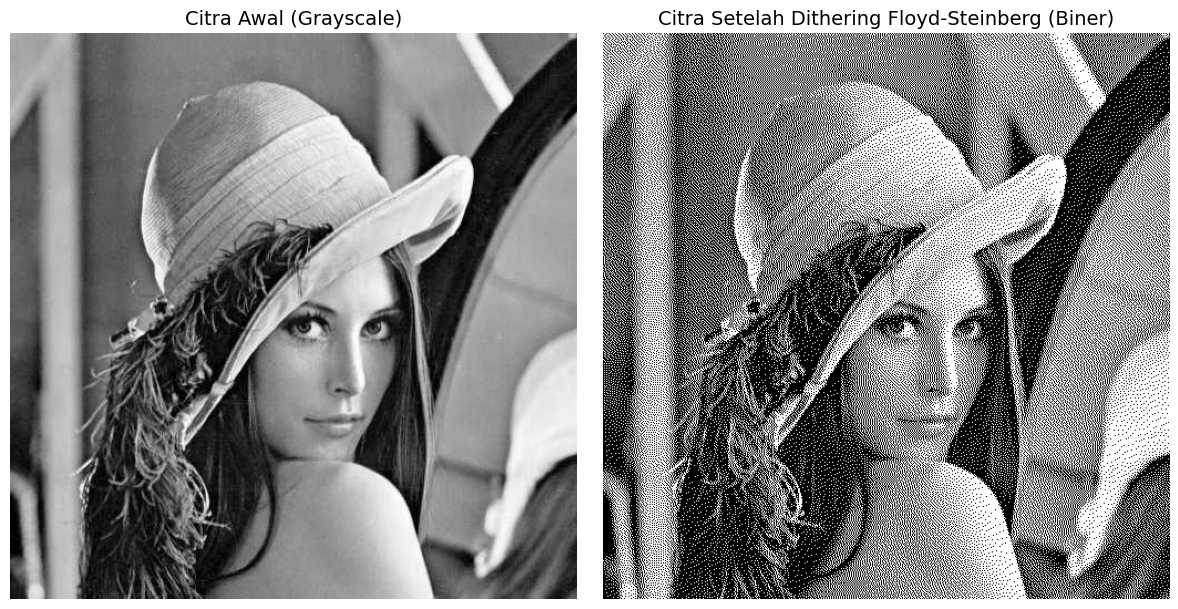

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- 0. Implementasi Manual Dithering Floyd-Steinberg ---
def floyd_steinberg_dithering(image_gray):
    """
    Menerapkan Dithering Floyd-Steinberg pada citra grayscale (8-bit)
    dan mengkuantisasi menjadi citra biner (0 atau 255).
    """
    # Mengonversi citra menjadi tipe data float untuk perhitungan error
    img_float = image_gray.astype(float)
    h, w = img_float.shape

    # Menentukan palet output (Hanya 2 level: Hitam dan Putih)
    # L = 256 (max value) * (1 / 2) = 128
    # Batas ambang (threshold) = 128

    for y in range(h):
        for x in range(w):
            old_pixel = img_float[y, x]

            # Kuantisasi: Bulatkan ke nilai terdekat di palet (0 atau 255)
            # Thresholding sederhana: jika > 128, jadikan 255 (putih), jika tidak, jadikan 0 (hitam)
            new_pixel = 255 if old_pixel >= 128 else 0

            # Terapkan piksel baru
            img_float[y, x] = new_pixel

            # Hitung Error
            quant_error = old_pixel - new_pixel

            # Sebarkan Error ke tetangga (hanya jika tetangga ada)
            # Matriks penyebaran:
            #       X   7/16
            # 3/16 5/16 1/16

            # (x + 1, y) : Kanan (7/16)
            if x + 1 < w:
                img_float[y, x + 1] += quant_error * 7 / 16

            # (x - 1, y + 1) : Kiri Bawah (3/16)
            if x - 1 >= 0 and y + 1 < h:
                img_float[y + 1, x - 1] += quant_error * 3 / 16

            # (x, y + 1) : Bawah (5/16)
            if y + 1 < h:
                img_float[y + 1, x] += quant_error * 5 / 16

            # (x + 1, y + 1) : Kanan Bawah (1/16)
            if x + 1 < w and y + 1 < h:
                img_float[y + 1, x + 1] += quant_error * 1 / 16

    # Konversi kembali ke tipe data np.uint8 (0 atau 255)
    return img_float.astype(np.uint8)


# --- 1. Memuat dan Mengonversi Citra ---

# Gunakan 'lena.jpg' sesuai instruksi soal
path_lena = '/content/drive/MyDrive/PCVK/Image Jobsheet/lena.jpg'
img_bgr = cv.imread(path_lena)

if img_bgr is None:
    print(f"Gagal memuat citra di jalur: {path_lena}")
    print("Mencoba menggunakan 'lena_lc.jpg' sebagai alternatif.")
    # Fallback ke lena_lc.jpg
    path_lena_lc = '/content/drive/MyDrive/PCVK/Image Jobsheet/lena_lc.jpg'
    img_bgr = cv.imread(path_lena_lc)
    if img_bgr is None:
        raise FileNotFoundError("Citra 'lena.jpg' dan 'lena_lc.jpg' tidak ditemukan di jalur yang ditentukan.")

# Konversi ke Grayscale untuk Dithering
img_gray_awal = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)


# --- 2. Proses Dithering Floyd-Steinberg ---
print("Memproses Dithering Floyd-Steinberg...")
img_dithered = floyd_steinberg_dithering(img_gray_awal)
print("Proses Dithering Selesai.")


# --- 3. Menampilkan Citra Awal dan Hasil Dithering ---
plt.figure(figsize=(12, 6))

# Tampilkan Citra Grayscale Awal
plt.subplot(1, 2, 1)
plt.imshow(img_gray_awal, cmap='gray')
plt.title('Citra Awal (Grayscale)', fontsize=14)
plt.axis('off')

# Tampilkan Citra Hasil Dithering
plt.subplot(1, 2, 2)
plt.imshow(img_dithered, cmap='gray')
plt.title('Citra Setelah Dithering Floyd-Steinberg (Biner)', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

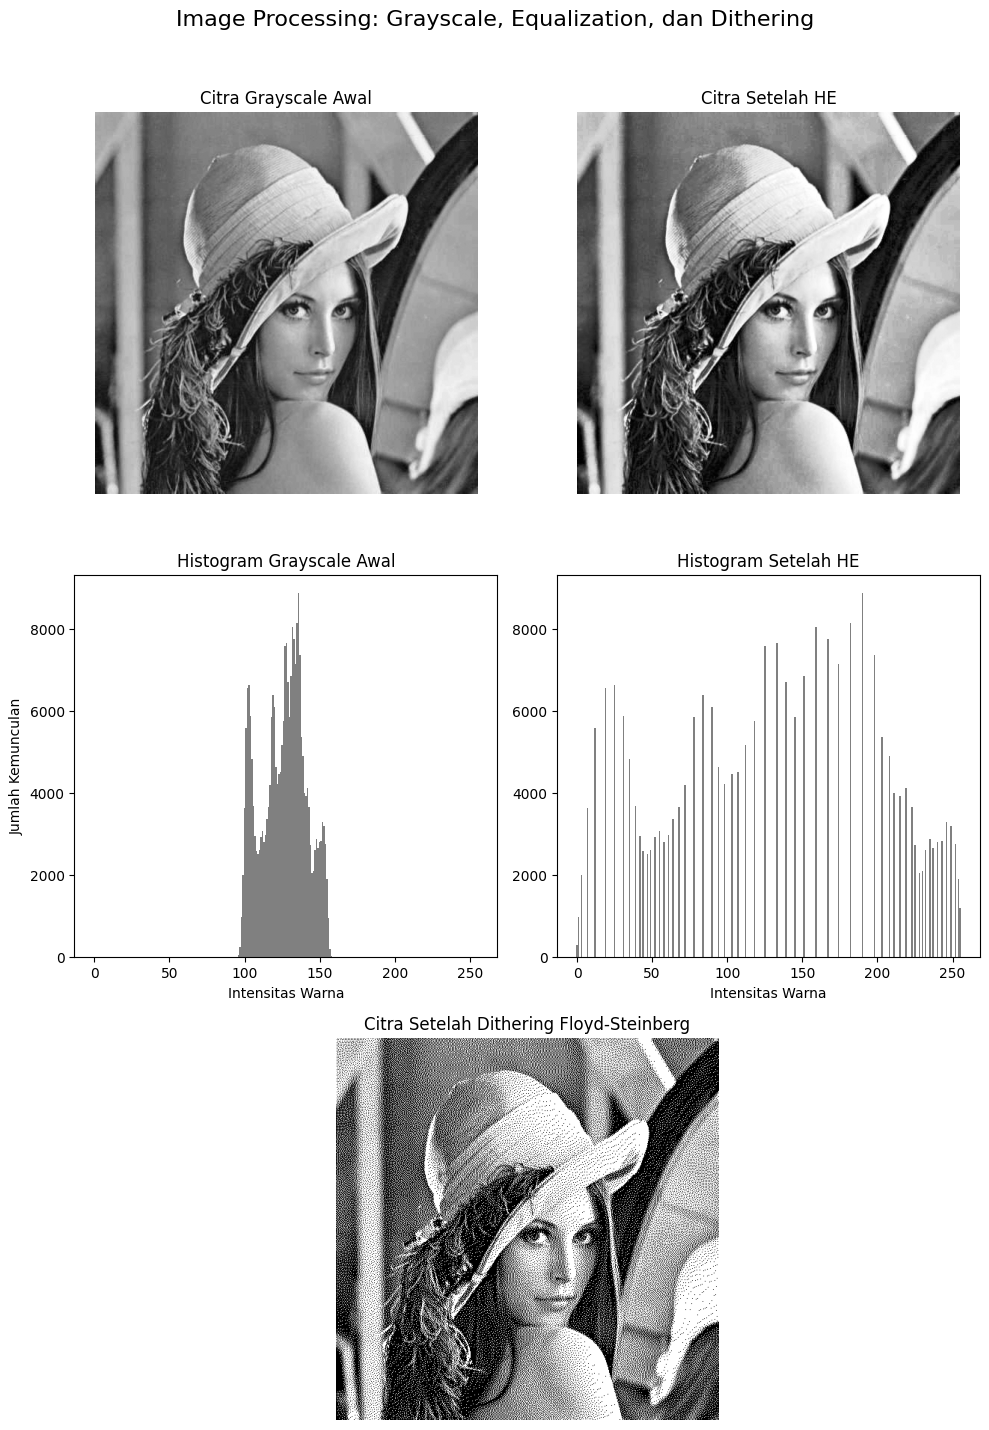

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- 0. Fungsi Dithering Floyd-Steinberg ---
def floyd_steinberg_dithering(image_gray):
    """
    Menerapkan Dithering Floyd-Steinberg pada citra grayscale (8-bit)
    dan mengkuantisasi menjadi citra biner (0 atau 255).
    """
    # Buat salinan dalam tipe float untuk perhitungan error
    img_float = image_gray.astype(float).copy()
    h, w = img_float.shape

    for y in range(h):
        for x in range(w):
            old_pixel = img_float[y, x]

            # Kuantisasi ke biner (0 atau 255)
            # Threshold = 128
            new_pixel = 255 if old_pixel >= 128 else 0
            img_float[y, x] = new_pixel

            # Hitung Error
            quant_error = old_pixel - new_pixel

            # Sebarkan Error ke tetangga dengan bobot Floyd-Steinberg
            if x + 1 < w:
                img_float[y, x + 1] += quant_error * 7 / 16
            if y + 1 < h:
                if x - 1 >= 0:
                    img_float[y + 1, x - 1] += quant_error * 3 / 16
                img_float[y + 1, x] += quant_error * 5 / 16
                if x + 1 < w:
                    img_float[y + 1, x + 1] += quant_error * 1 / 16

    return img_float.astype(np.uint8)

# --- 1. Memuat Citra dan Konversi ke Grayscale ---
path_lena_lc = '/content/drive/MyDrive/PCVK/Image Jobsheet/lena_lc.jpg'
img_bgr = cv.imread(path_lena_lc)

if img_bgr is None:
    print(f"Gagal memuat citra di jalur: {path_lena_lc}")
    path_lena = '/content/drive/MyDrive/PCVK/Image Jobsheet/lena_lc.jpg'
    img_bgr = cv.imread(path_lena)
    if img_bgr is None:
        raise FileNotFoundError("Citra tidak ditemukan di jalur yang ditentukan.")

# Konversi ke Grayscale
img_gray_awal = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)


# --- 2. Histogram Equalization (HE) pada Grayscale ---
img_gray_equalized = cv.equalizeHist(img_gray_awal)


# --- 3. Dithering Floyd-Steinberg ---
# Diterapkan pada citra hasil equalization
img_dithered = floyd_steinberg_dithering(img_gray_equalized)


# --- 4. Menghitung Histogram ---
# Hitung histogram menggunakan NumPy
hist_awal, _ = np.histogram(img_gray_awal.flatten(), 256, [0, 256])
hist_eq, _ = np.histogram(img_gray_equalized.flatten(), 256, [0, 256])
names = np.arange(256)


# --- 5. Menampilkan Output Sesuai Format 3 Baris ---
fig = plt.figure(figsize=(10, 15))
fig.suptitle('Image Processing: Grayscale, Equalization, dan Dithering', fontsize=16, y=0.98)

# BARIS 1: Citra Awal vs Citra Equalized
ax1 = fig.add_subplot(3, 2, 1)
ax1.imshow(img_gray_awal, cmap='gray')
ax1.set_title('Citra Grayscale Awal', fontsize=12)
ax1.axis('off')

ax2 = fig.add_subplot(3, 2, 2)
ax2.imshow(img_gray_equalized, cmap='gray')
ax2.set_title('Citra Setelah HE', fontsize=12)
ax2.axis('off')

# BARIS 2: Histogram Awal vs Histogram Equalized
# Subplot 3 dan 4
ax3 = fig.add_subplot(3, 2, 3)
ax3.bar(names, hist_awal, width=1.0, color='gray')
ax3.set_title('Histogram Grayscale Awal', fontsize=12)
ax3.set_xlabel('Intensitas Warna')
ax3.set_ylabel('Jumlah Kemunculan')

ax4 = fig.add_subplot(3, 2, 4)
ax4.bar(names, hist_eq, width=1.0, color='gray')
ax4.set_title('Histogram Setelah HE', fontsize=12)
ax4.set_xlabel('Intensitas Warna')
ax4.sharey(ax3) # Bagikan skala Y agar mudah dibandingkan

# BARIS 3: Citra Setelah Dithering
# Subplot ini mengambil seluruh lebar baris 3 (dari 3 baris total)
ax5 = fig.add_subplot(3, 1, 3)
ax5.imshow(img_dithered, cmap='gray')
ax5.set_title('Citra Setelah Dithering Floyd-Steinberg', fontsize=12)
ax5.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()